In [7]:
import tensorflow as tf
import keras

import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout,Flatten
from keras.models import Sequential
from keras.datasets import cifar10
from skimage  import color
from keras.models import Model
from sklearn.metrics import precision_score , recall_score, f1_score, accuracy_score, confusion_matrix
import datetime
import seaborn as sns





In [9]:
## 1-> Load_Dataset
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
(x_train,x_valid) = x_train[5000:],x_train[:5000]
(y_train,y_valid) = y_train[5000:],y_train[:5000]
Labels =['airplane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']


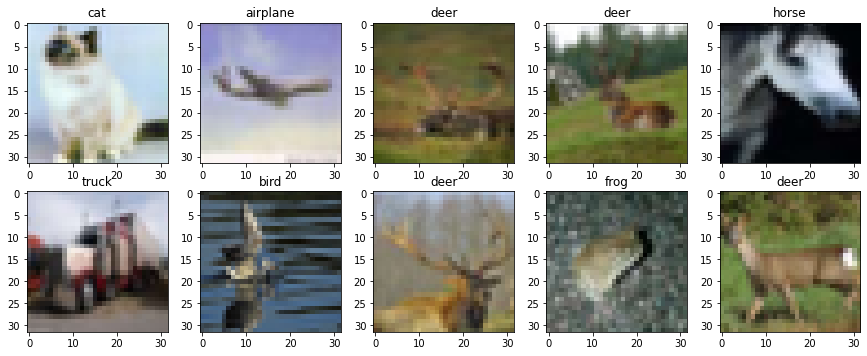

In [107]:
plt.figure(figsize=(15, 15))
for i in range(1,11):
    image_index = np.random.randint(45000)
    label_index = y_train[image_index]
    img = x_train[image_index]
    plt.subplot(5,5,i)
    plt.title(Labels[label_index.item()])
    plt.imshow(img)
plt.show()

In [10]:
## Normalizing

x_train = color.rgb2gray(x_train)
x_test = color.rgb2gray(x_test)
x_valid = color.rgb2gray(x_valid)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_valid = x_valid.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0
x_valid = x_valid / 255.0

## Create one_hot Labels
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)
y_valid = tf.keras.utils.to_categorical(y_valid,10)

In [ ]:
##Model_1-> Create_Model
model = Sequential()
model.add(Flatten(input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])


In [ ]:
## Model_1-> Train_Model
start = datetime.datetime.now()
trainedModel = model.fit(x_train,y_train,batch_size=64,epochs=20,validation_data=(x_valid,y_valid))
end = datetime.datetime.now()

Epoch 1/20
704/704 [==============================] - 10s 8ms/step - loss: 2.1870 - accuracy: 0.1911 - val_loss: 2.0801 - val_accuracy: 0.2416
Epoch 2/20
704/704 [==============================] - 4s 6ms/step - loss: 2.0731 - accuracy: 0.2479 - val_loss: 2.0504 - val_accuracy: 0.2544
Epoch 3/20
704/704 [==============================] - 3s 4ms/step - loss: 2.0503 - accuracy: 0.2628 - val_loss: 2.0374 - val_accuracy: 0.2630
Epoch 4/20
704/704 [==============================] - 3s 4ms/step - loss: 2.0327 - accuracy: 0.2699 - val_loss: 2.0217 - val_accuracy: 0.2684
Epoch 5/20
704/704 [==============================] - 3s 4ms/step - loss: 2.0111 - accuracy: 0.2780 - val_loss: 1.9943 - val_accuracy: 0.2764
Epoch 6/20
704/704 [==============================] - 3s 4ms/step - loss: 1.9866 - accuracy: 0.2884 - val_loss: 1.9701 - val_accuracy: 0.2868
Epoch 7/20
704/704 [==============================] - 3s 4ms/step - loss: 1.9634 - accuracy: 0.2958 - val_loss: 1.9517 - val_accuracy: 0.2972
Epoch

In [ ]:

## Model_1->Evaluate_Model
test_loss,test_accuracy = model.evaluate(x_test,y_test, verbose = 0)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)


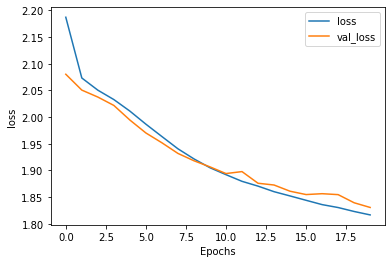

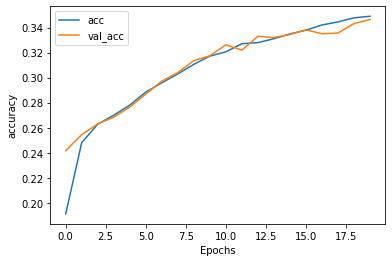

In [ ]:
## Model_1->Plot
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

test loss = 1.815923
test accuracy = 0.358500
Accuracy: 0.358500
Precision: 0.357640
Recall: 0.358500
F1 score: 0.351988
Training_Time =  0:01:09.935612


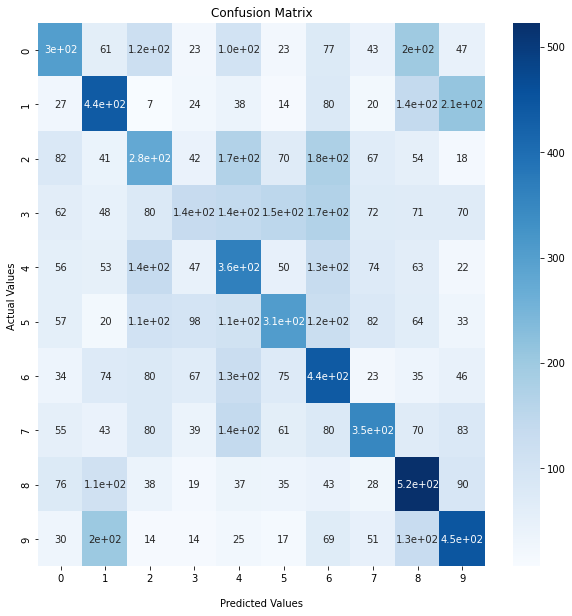

In [ ]:

## Model_1-> Precision,recall,F1,Confusion_matrix

print('test loss = %f' % test_loss)
print('test accuracy = %f' % test_accuracy)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)
print("Training_Time = ",end-start)
cf_matrix  = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10, 10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [ ]:
##Model_2-> Create_Model
model = Sequential()
model.add(Flatten(input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## Model_2-> Train_Model
start = datetime.datetime.now()
trainedModel = model.fit(x_train,y_train,batch_size=64,epochs=20,validation_data=(x_valid,y_valid))
end = datetime.datetime.now()

Epoch 1/20
704/704 [==============================] - 5s 5ms/step - loss: 2.1522 - accuracy: 0.1985 - val_loss: 2.0478 - val_accuracy: 0.2526
Epoch 2/20
704/704 [==============================] - 3s 5ms/step - loss: 2.0377 - accuracy: 0.2635 - val_loss: 2.0123 - val_accuracy: 0.2684
Epoch 3/20
704/704 [==============================] - 3s 5ms/step - loss: 1.9866 - accuracy: 0.2846 - val_loss: 1.9472 - val_accuracy: 0.3010
Epoch 4/20
704/704 [==============================] - 3s 4ms/step - loss: 1.9393 - accuracy: 0.3058 - val_loss: 1.9118 - val_accuracy: 0.3160
Epoch 5/20
704/704 [==============================] - 3s 5ms/step - loss: 1.9012 - accuracy: 0.3187 - val_loss: 1.8989 - val_accuracy: 0.3192
Epoch 6/20
704/704 [==============================] - 3s 4ms/step - loss: 1.8746 - accuracy: 0.3265 - val_loss: 1.8600 - val_accuracy: 0.3312
Epoch 7/20
704/704 [==============================] - 3s 5ms/step - loss: 1.8544 - accuracy: 0.3348 - val_loss: 1.8475 - val_accuracy: 0.3412
Epoch 

In [ ]:
## Model_2->Evaluate_Model
test_loss,test_accuracy = model.evaluate(x_test,y_test, verbose = 0)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

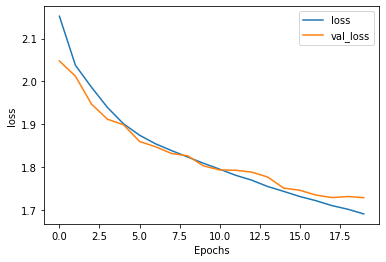

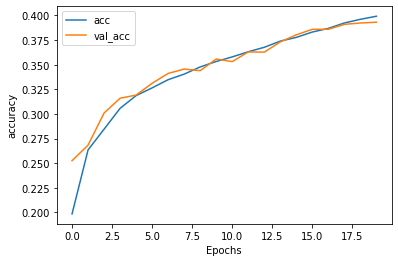

In [ ]:
## Model_2->Plot
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

test loss = 1.724555
test accuracy = 0.390600
Accuracy: 0.390600
Precision: 0.402696
Recall: 0.390600
F1 score: 0.387940
Training_Time =  0:01:06.364425


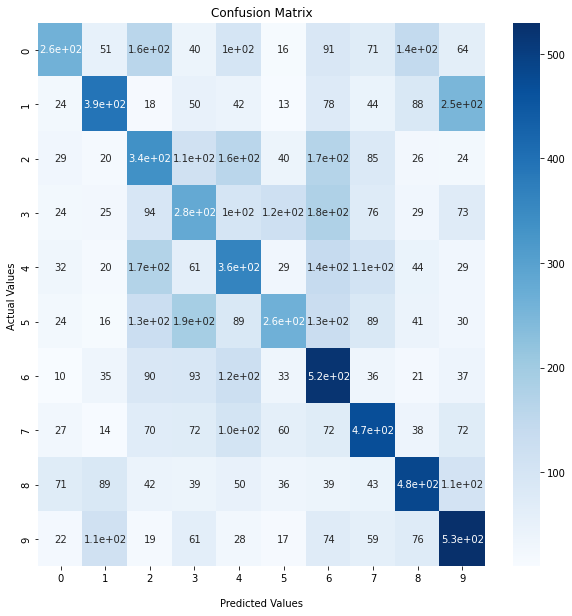

In [ ]:
## Model_2-> Precision,recall,F1,Confusion_matrix

print('test loss = %f' % test_loss)
print('test accuracy = %f' % test_accuracy)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)
print("Training_Time = ",end-start)
cf_matrix  = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10, 10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [ ]:
##Model_3-> Create_Model
model = Sequential()
model.add(Flatten(input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## Model_3-> Train_Model
start = datetime.datetime.now()
trainedModel = model.fit(x_train,y_train,batch_size=64,epochs=20,validation_data=(x_valid,y_valid))
end = datetime.datetime.now()

In [ ]:
## Model_3->Evaluate_Model
test_loss,test_accuracy = model.evaluate(x_test,y_test, verbose = 0)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

In [ ]:
## Model_3->Plot
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

test loss = 1.658532
test accuracy = 0.411000
Accuracy: 0.411000
Precision: 0.407090
Recall: 0.411000
F1 score: 0.401879
Training_Time =  0:01:13.742763


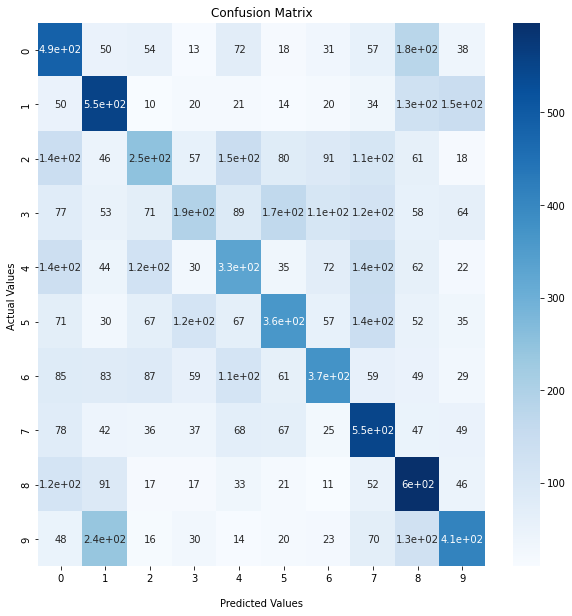

In [ ]:
## Model_3-> Precision,recall,F1,Confusion_matrix

print('test loss = %f' % test_loss)
print('test accuracy = %f' % test_accuracy)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)
print("Training_Time = ",end-start)
cf_matrix  = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10, 10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

## Batch_size(32,64,128,512)


In [ ]:
##Create_Model
model = Sequential()
model.add(Flatten(input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## Model_3-> Train_Model
start = datetime.datetime.now()
trainedModel = model.fit(x_train,y_train,batch_size=512,epochs=20,validation_data=(x_valid,y_valid))
end = datetime.datetime.now()

In [ ]:
## Model_3->Evaluate_Model
test_loss,test_accuracy = model.evaluate(x_test,y_test, verbose = 0)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

In [ ]:
## Model_3->Plot
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [ ]:
## Model_3-> Precision,recall,F1,Confusion_matrix

print('test loss = %f' % test_loss)
print('test accuracy = %f' % test_accuracy)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)
print("Training_Time = ",end-start)
cf_matrix  = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10, 10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

##H->Activation_Function(ReLU,Sigmoid,tanh,softmax)


In [ ]:
#D--> Activation_Function
## Create_Model
model = Sequential()
model.add(Flatten(input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## Train_Model
start = datetime.datetime.now()
trainedModel = model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_valid,y_valid))
end = datetime.datetime.now()

In [ ]:
## Evaluate_Model
test_loss,test_accuracy = model.evaluate(x_test,y_test, verbose = 0)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

In [ ]:
## >Plot
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [ ]:
## Precision,recall,F1,Confusion_matrix

print('test loss = %f' % test_loss)
print('test accuracy = %f' % test_accuracy)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)
print("Training_Time = ",end-start)
cf_matrix  = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10, 10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

## Loss_Functions(categorical_crossentropy, KLDivergence, poisson)

In [6]:
#D--> Loss_Function
## Create_Model
model = Sequential()
model.add(Flatten(input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer= 'adam', loss= 'poisson', metrics=['accuracy'])
# model.compile(optimizer= 'adam', loss= 'KLDivergence', metrics=['accuracy'])
# model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## Train_Model
start = datetime.datetime.now()
trainedModel = model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_valid,y_valid))
end = datetime.datetime.now()

In [91]:
## Evaluate_Model
test_loss,test_accuracy = model.evaluate(x_test,y_test, verbose = 0)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

In [ ]:
## >Plot
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [ ]:
## Precision,recall,F1,Confusion_matrix

print('test loss = %f' % test_loss)
print('test accuracy = %f' % test_accuracy)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)
print("Training_Time = ",end-start)
cf_matrix  = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10, 10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

## Optimizer(SGD,Adam,RMSprop)

In [121]:
#D--> Optimizer
## Create_Model
model = Sequential()
model.add(Flatten(input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer= 'adam', loss= 'poisson', metrics=['accuracy'])
# model.compile(optimizer= 'RMSprop', loss= 'poisson', metrics=['accuracy'])
# model.compile(optimizer= 'SGD', loss= 'poisson', metrics=['accuracy'])


In [ ]:
## Train_Model
start = datetime.datetime.now()
trainedModel = model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_valid,y_valid))
end = datetime.datetime.now()

In [123]:
## Evaluate_Model
test_loss,test_accuracy = model.evaluate(x_test,y_test, verbose = 0)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

In [ ]:
## >Plot
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [ ]:
## Precision,recall,F1,Confusion_matrix

print('test loss = %f' % test_loss)
print('test accuracy = %f' % test_accuracy)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)
print("Training_Time = ",end-start)
cf_matrix  = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10, 10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

##Number of Layers(3,4,5)

In [143]:
#D--> Optimizer
## Create_Model
model = Sequential()
model.add(Flatten(input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer= 'adam', loss= 'poisson', metrics=['accuracy'])

In [144]:
## Train_Model
start = datetime.datetime.now()
trainedModel = model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_valid,y_valid))
end = datetime.datetime.now()

Epoch 1/20
1407/1407 [==============================] - 8s 5ms/step - loss: 0.3142 - accuracy: 0.1963 - val_loss: 0.3051 - val_accuracy: 0.2468
Epoch 2/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3033 - accuracy: 0.2591 - val_loss: 0.2991 - val_accuracy: 0.2784
Epoch 3/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2967 - accuracy: 0.2918 - val_loss: 0.2918 - val_accuracy: 0.3194
Epoch 4/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2919 - accuracy: 0.3084 - val_loss: 0.2875 - val_accuracy: 0.3376
Epoch 5/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2893 - accuracy: 0.3194 - val_loss: 0.2871 - val_accuracy: 0.3334
Epoch 6/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2875 - accuracy: 0.3257 - val_loss: 0.2839 - val_accuracy: 0.3488
Epoch 7/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2857 - accuracy: 0.3332 - val_loss: 0.2839 - val_accuracy:

In [145]:
## Evaluate_Model
test_loss,test_accuracy = model.evaluate(x_test,y_test, verbose = 0)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

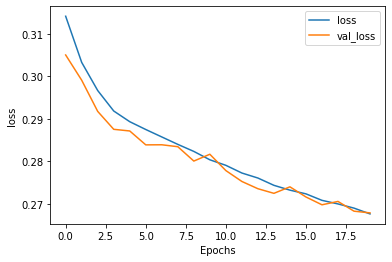

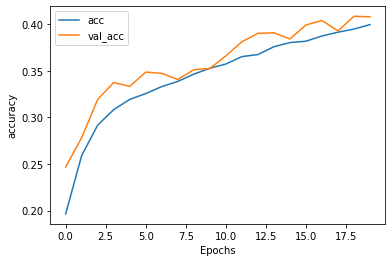

In [146]:
## >Plot
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

test loss = 0.267000
test accuracy = 0.404500
Accuracy: 0.404500
Precision: 0.406627
Recall: 0.404500
F1 score: 0.395582
Training_Time =  0:02:22.577411


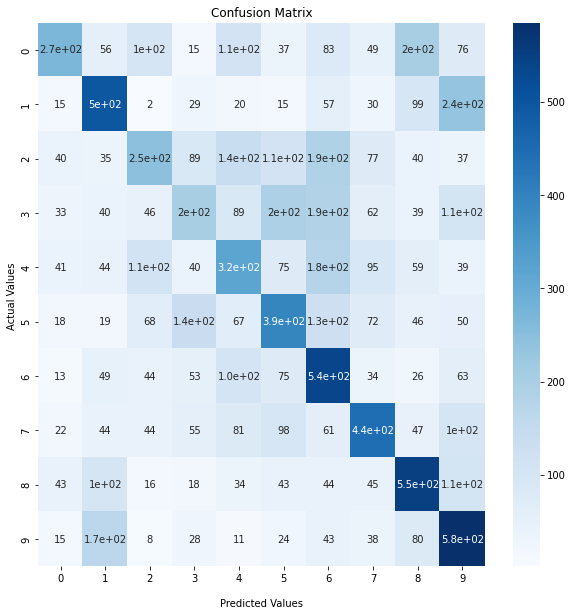

In [147]:
## Precision,recall,F1,Confusion_matrix

print('test loss = %f' % test_loss)
print('test accuracy = %f' % test_accuracy)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)
print("Training_Time = ",end-start)
cf_matrix  = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10, 10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

##Best_Model

In [11]:
## Create_Model
model = Sequential()
model.add(Flatten(input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer= 'adam', loss= 'poisson', metrics=['accuracy'])

In [12]:
## Train_Model
start = datetime.datetime.now()
trainedModel = model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_valid,y_valid))
end = datetime.datetime.now()

Epoch 1/20
1407/1407 [==============================] - 23s 16ms/step - loss: 0.3127 - accuracy: 0.2131 - val_loss: 0.3053 - val_accuracy: 0.2568
Epoch 2/20
1407/1407 [==============================] - 20s 14ms/step - loss: 0.3015 - accuracy: 0.2720 - val_loss: 0.2960 - val_accuracy: 0.2986
Epoch 3/20
1407/1407 [==============================] - 20s 14ms/step - loss: 0.2955 - accuracy: 0.2977 - val_loss: 0.2921 - val_accuracy: 0.3096
Epoch 4/20
1407/1407 [==============================] - 19s 14ms/step - loss: 0.2914 - accuracy: 0.3139 - val_loss: 0.2879 - val_accuracy: 0.3268
Epoch 5/20
1407/1407 [==============================] - 19s 14ms/step - loss: 0.2887 - accuracy: 0.3227 - val_loss: 0.2871 - val_accuracy: 0.3376
Epoch 6/20
1407/1407 [==============================] - 19s 14ms/step - loss: 0.2865 - accuracy: 0.3319 - val_loss: 0.2844 - val_accuracy: 0.3438
Epoch 7/20
1407/1407 [==============================] - 20s 14ms/step - loss: 0.2850 - accuracy: 0.3372 - val_loss: 0.2820 -

In [13]:
## Evaluate_Model
test_loss,test_accuracy = model.evaluate(x_test,y_test, verbose = 0)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

test loss = 0.266027
test accuracy = 0.408500
Accuracy: 0.408500
Precision: 0.411515
Recall: 0.408500
F1 score: 0.400275
Training_Time =  0:07:22.953906


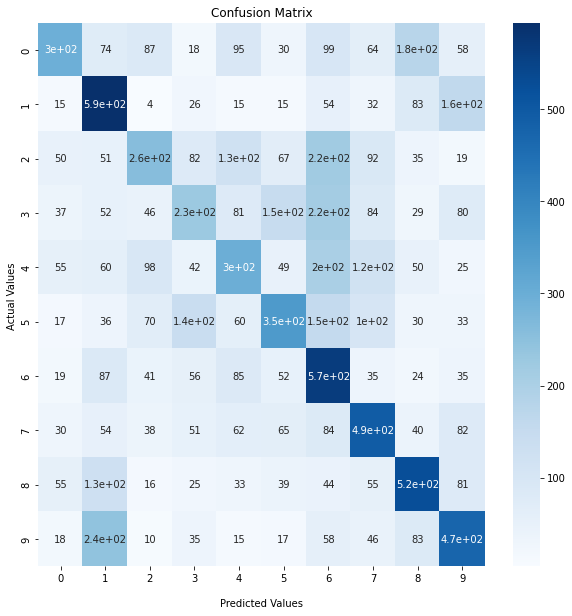

In [14]:
## Precision,recall,F1,Confusion_matrix

print('test loss = %f' % test_loss)
print('test accuracy = %f' % test_accuracy)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)
print("Training_Time = ",end-start)
cf_matrix  = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10, 10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()